# Classification Example

## Daniel Wilcox: 19147414

This example problem can be found within chapter 3 of the "Hands-on Machine Learning with Scikit-Learn and TensorFlow" by Aurélien Géron. 

This project will be using the MNIST dataset which is a collection of 28x28 pixel images of written digits from 0-9.

## 0) Getting the data.

In [1]:
#General imports for operating system, unzip and URL's
import os
from six.moves import urllib
from scipy.io import loadmat
from sklearn.datasets import fetch_mldata

#Graphics
import matplotlib
import matplotlib.pyplot as plt

#Array Manipulation
import numpy as np

from sklearn.linear_model import SGDClassifier

#Shuffles data to test/train sets that represent the original data
from sklearn.model_selection import StratifiedKFold

#Cross-validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.metrics import confusion_matrix

from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.ensemble import RandomForestClassifier

from sklearn.multiclass import OneVsOneClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score


from sklearn.base import clone

#Creating custom Transformers
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import FunctionTransformer

import random

#Model Tuning
from sklearn.model_selection import GridSearchCV

#Image shifting
from scipy.ndimage.interpolation import shift

In [2]:
#The Location to save the dataset
MNIST_PATH = "datasets/MNIST"
MNIST_URL = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
MNIST_MAT = "/mnist-original.mat"

In [3]:
def load_MNIST_data(mnist_path=MNIST_PATH, mnist_mat=MNIST_MAT):
        mnist_raw = loadmat(mnist_path+mnist_mat)
        mnist = {"data": mnist_raw["data"].T,
                 "target": mnist_raw["label"][0],
                 "Col_names": ["target", "data"],
                 "DESCR": "mldata.org dataset: mnist-original",
                }
        print("Data Successfully extracted from mnist.mat!")
        return mnist
        
    
def get_MNIST_data(mnist_path=MNIST_PATH, mnist_url=MNIST_URL, mnist_mat=MNIST_MAT):
    
    print("Checking if directory exists...")
    if not os.path.isdir(mnist_path):
        os.makedirs(mnist_path)
        print("Creating directory")
    
    else: 
        print("Directory exists")
        
        #------------------------------------------------------------------
        #uncomment if connected to internet
        #try:
            #print("\nAttempting to get MNIST data from mldata.org ...")
            #mnist = fetch_mldata('MNIST original')
            #print("\nSuccess!")
            #return mnist
    
        #except urllib.error.HTTPError as ex:
            #print("\nCan't reach mldata.org, attempting alternative...")
            #print("Checking if mnist.mat file exists...")  
            
        #------------------------------------------------------------------
        #followig if, else should fall under 'except' 
            
        if os.path.isfile(mnist_path+mnist_mat):
            print("mnist.mat file does exists...")
            print("extracting data from mnist.mat...")
            
            mnist = load_MNIST_data(mnist_path, mnist_mat)
            print("\nSuccess!")
            return mnist
        
        else:
            print("mnist.mat file doesn't exists...")
            print("downloading mnist.mat file...")
            url_response = urllib.request.urlopen(mnist_url)
            
            print("\nCreating .mat file")
            with open(mnist_path+mnist_mat, "wb") as f:
                contents = url_response.read()
                f.write(contents)
            mnist = load_MNIST_data(mnist_path, mnist_mat)
            print("\nSuccess!")
            return mnist
            

In [4]:
mnist = get_MNIST_data(MNIST_PATH, MNIST_URL, MNIST_MAT)
mnist            


Checking if directory exists...
Directory exists
mnist.mat file does exists...
extracting data from mnist.mat...
Data Successfully extracted from mnist.mat!

Success!


{'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'Col_names': ['target', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original'}

In [5]:
X, y = mnist["data"], mnist["target"]
print("Shape of \"Data\": {}\nShape of \"target\": {}\n".format(X.shape,y.shape))

Shape of "Data": (70000, 784)
Shape of "target": (70000,)



In [6]:
def plot_digits(X):
    rand_digit = X
    rand_digit_img = rand_digit.reshape(28, 28)
    plt.imshow(rand_digit_img, cmap = matplotlib.cm.binary, 
           interpolation="nearest")

    plt.axis("off")
    plt.show()

The chosen number that is displayed is labeled as "5.0".



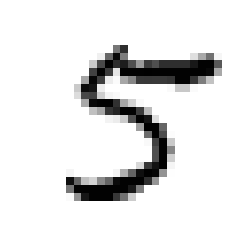

In [7]:
random.seed(107)
rand_num = random.randrange(0, len(X))

rand_digit = X[rand_num]
print("The chosen number that is displayed is labeled as \"{}\".\n".format(y[rand_num]))

plot_digits(rand_digit)

In [8]:
#MNIST is already split into train and test
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
#Shuffle training set to guarentee cross-validation folds are similar.
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

## Binary Classifier
Only classify whether digit is a 5 or not 5

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [11]:
sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([rand_digit])

array([ True])

## Performance Measures
### Cross-Validation

In [13]:
sk_Folds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in sk_Folds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_5[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_predicted = clone_clf.predict(X_test_folds)
    n_correct = sum(y_predicted == y_test_folds)
    print("Correct prediciton percentage: {}%".format((n_correct/len(y_predicted)*100.0)))
    

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Correct prediciton percentage: 95.975%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Correct prediciton percentage: 94.825%


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


Correct prediciton percentage: 96.615%


In [14]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.95975, 0.94825, 0.96615])

Just predict that all values are not 5

In [15]:
class Not5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

It can be seen that accuracies are around 90%. This makes sense as 5's are only 10% of the data.

In [16]:
not_5_clf = Not5Classifier()
cross_val_score(not_5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91   , 0.91075, 0.9082 ])

### Confusion Matrix

In [17]:
y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

In [18]:
con_m = confusion_matrix(y_train_5, y_train_predict)

print("True Neg: {}\t\tFalse Pos: {}\nFalse Neg: {}\t\tTrue Pos: {}\n"
      .format(con_m[0][0], con_m[0][1], con_m[1][0], con_m[1][1]))


True Neg: 53875		False Pos: 704
False Neg: 1813		True Pos: 3608



In [19]:
#Precision = TP/(TP + FP)
Precision = precision_score(y_train_5, y_train_predict)

#Recall = TP/(TP + FN)
Recall = recall_score(y_train_5, y_train_predict)

print("Precision: {}\nRecall: {}\n ".format(Precision, Recall))

Precision: 0.8367346938775511
Recall: 0.6655598598044641
 


In [20]:
f1 = f1_score(y_train_5, y_train_predict)
print("F1 score: {}\n".format(f1))


F1 score: 0.7413952532620981



### Precision/Recall trade-off

In [21]:
y_scores = sgd_clf.decision_function([rand_digit])
y_scores

array([234809.17170425])

In [22]:
threshold = 0
y_rand_digit = (y_scores > threshold)
y_rand_digit

array([ True])

In [23]:
threshold = 200000
y_rand_digit = (y_scores > threshold)
y_rand_digit

array([ True])

In [24]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5,
                            cv=3, method="decision_function")

precision, recall, thresholds = precision_recall_curve(y_train_5, y_scores)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

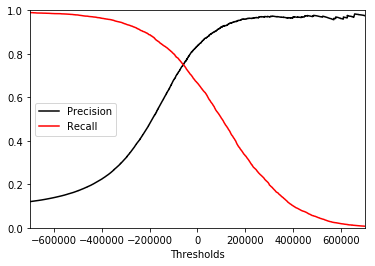

In [25]:
def plot_precision_recall_vs_threshold(precision, recall, thresholds):
    plt.plot(thresholds, precision[:-1], "k-", label="Precision")
    plt.plot(thresholds, recall[:-1], "r-", label="Recall")
    plt.xlabel("Thresholds")
    plt.legend(loc="center left")
    plt.xlim([-700000, 700000])
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precision, recall, thresholds)
plt.show()

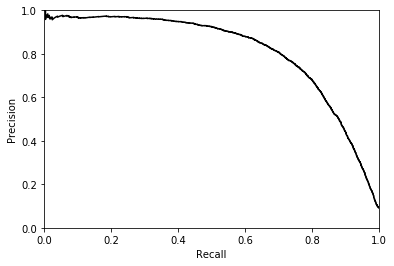

In [26]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "k-")
    plt.ylabel("Precision")
    plt.xlabel("Recall")
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    
plot_precision_vs_recall(precision, recall)
plt.show()

In [27]:
y_train_predict_90 = (y_scores > 150000)

pre = precision_score(y_train_5, y_train_predict_90)
rec = recall_score(y_train_5, y_train_predict_90)

print("Precision Score: {}\nRecall Score: {}\n ".format(pre, rec))

Precision Score: 0.9453551912568307
Recall Score: 0.4148681055155875
 


### ROC curve

In [28]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

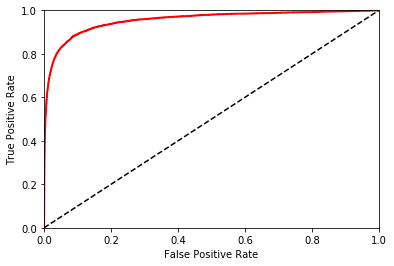

In [29]:
def plot_ROC_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, 'r-', linewidth=2, label=label)
    plt.plot([0,1], [0,1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    
plot_ROC_curve(fpr, tpr)
plt.show()

In [30]:
roc_auc_score(y_train_5, y_scores)

0.954737769555865

In [31]:
f_clf = RandomForestClassifier(random_state=42)
y_probas_f = cross_val_predict(f_clf, X_train, y_train_5,
                              cv=3, method="predict_proba")

y_score_f = y_probas_f[:, 1]
fpr_f, tpr_f, threshold_f = roc_curve(y_train_5, y_score_f)

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

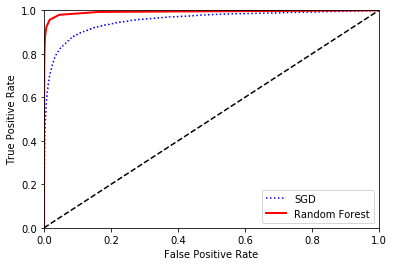

In [32]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_ROC_curve(fpr_f, tpr_f, "Random Forest")
plt.legend(loc="lower right")
plt.show

In [33]:
roc_auc_score(y_train_5, y_score_f)

0.992826424753757

## Multiclass Classification

In [34]:
#using scikit learn, it automatically applies One vs. All (OvA).

sgd_clf.fit(X_train, y_train)
sgd_clf.predict([rand_digit])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([5.])

In [35]:
rand_digit_score = sgd_clf.decision_function([rand_digit])
rand_digit_score

array([[ -259774.10254937,  -433541.12267684,  -599222.98216119,
         -286642.99446813,  -373900.41862473,   234809.17170425,
        -1122214.72579332,  -158494.47713793,  -339285.41178881,
         -328793.25375675]])

In [36]:
np.argmax(rand_digit_score)

5

In [37]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [38]:
#one vs one (OvO)
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([rand_digit])

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([5.])

In [39]:
#how many classifiers were made during the OvO case? N(N-1)/2
print("There are a total of {} classifiers made.\n".format(len(ovo_clf.estimators_)))

There are a total of 45 classifiers made.



In [40]:
#Training a random forest
f_clf.fit(X_train, y_train)
f_clf.predict([rand_digit])

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([5.])

In [41]:
#Show calculated probabilities of digits found in data location
f_clf.predict_proba([rand_digit])

array([[0. , 0. , 0. , 0.2, 0. , 0.7, 0. , 0. , 0.1, 0. ]])

In [42]:
#Cross validate
sgd_score = cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")
ovo_score = cross_val_score(ovo_clf, X_train, y_train, cv=3, scoring="accuracy")
forrest_score = cross_val_score(f_clf, X_train, y_train, cv=3, scoring="accuracy")

print("SGD score: {}\n".format(sgd_score))
print("OvO score: {}\n".format(ovo_score))
print("Random Forrest score: {}\n".format(forrest_score))



/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

SGD score: [0.87367526 0.87249362 0.87028054]

OvO score: [0.91771646 0.91389569 0.91538731]

Random Forrest score: [0.93881224 0.94059703 0.93919088]



In [43]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

sgd_score = cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
ovo_score = cross_val_score(ovo_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")
forrest_score = cross_val_score(f_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

print("SGD score: {}\n".format(sgd_score))
print("OvO score: {}\n".format(ovo_score))
print("Random Forrest score: {}\n".format(forrest_score))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

SGD score: [0.90656869 0.91299565 0.91103666]

OvO score: [0.91561688 0.92509625 0.91843777]

Random Forrest score: [0.93881224 0.94054703 0.93924089]



## Error Analysis

In [44]:
y_train_predict = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_predict)
conf_mx

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([[5741,    2,   24,    5,   12,   42,   46,    8,   40,    3],
       [   2, 6488,   49,   24,    6,   40,    6,   11,  107,    9],
       [  52,   37, 5344,   93,   86,   22,   91,   62,  157,   14],
       [  54,   41,  140, 5317,    3,  253,   34,   57,  142,   90],
       [  24,   30,   31,    7, 5372,    8,   56,   33,   82,  199],
       [  67,   48,   35,  166,   77, 4632,  105,   25,  179,   87],
       [  34,   29,   42,    1,   46,   83, 5631,    5,   47,    0],
       [  21,   25,   75,   28,   50,   11,    4, 5821,   16,  214],
       [  47,  167,   76,  140,   13,  162,   62,   26, 5028,  130],
       [  43,   36,   25,   83,  161,   34,    2,  236,   91, 5238]])

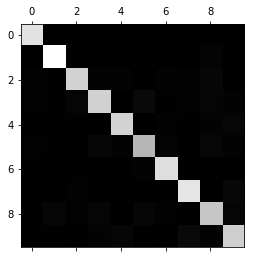

In [45]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [46]:
#currently unfairly displayed, "normalize" by dividing by the total number of attributes

row_sum = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx/row_sum

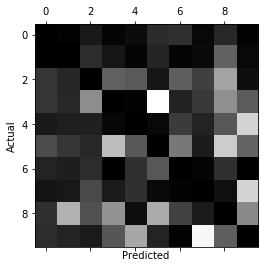

In [47]:
#fill diag with zeros to only see the errors
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## Multilabel Classification

In [48]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [49]:
knn_clf.predict([rand_digit])

array([[False,  True]])

In [ ]:
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

In [ ]:
knn_f1 = f1_score(y_multilabel, y_train_knn_pred, average="macro")
print("F1 score: {}\n".format(knn_f1))


## Multioutput Classification

In [50]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise

noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

y_train_mod = X_train
y_test_mod = X_test

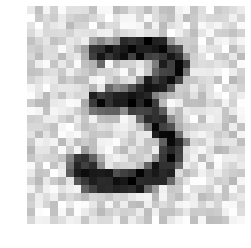

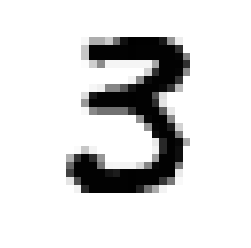

In [51]:

random.seed(107)
rand_index = random.randrange(0, len(X_test_mod))

#Noisy Image
plot_digits(X_test_mod[rand_index])

#Normal Image
plot_digits(y_test_mod[rand_index])


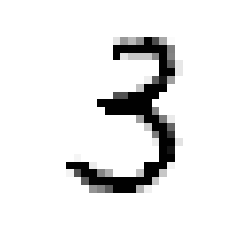

In [52]:
knn_clf.fit(X_train_mod, y_train_mod) 
clean_digit = knn_clf.predict([X_test_mod[rand_index]])

plot_digits(clean_digit)

# Exercises
## 1) >97% Accuracy Classifier
1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).

### References for Question 1:


In [57]:
#param_grid = [
#        {'n_neighbors': [3, 4, 5],
#        'weights': ['uniform','distance']
#        },
#    ]


#to speed things up
#-----------------------------------
param_grid = [
        {'n_neighbors': [4],
        'weights': ['distance']
        },
    ]
#-----------------------------------

grid_search = GridSearchCV(knn_clf, param_grid, cv=4, verbose=2, n_jobs=4)

In [58]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   2 out of   4 | elapsed:  9.9min remaining:  9.9min


KeyboardInterrupt: 

In [ ]:
grid_search.best_params_

In [ ]:
grid_search.best_score_

In [ ]:
y_predict = grid_search.predict(X_test)
acc = accuracy_score(y_test, y_predict)

print("Accuracy score: {}\n".format(acc))

## 2) Data Augmentation: Shift Image
2. Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel. Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.
### References for Question 2:

In [ ]:
#function to shift image
def shifter(img, dx, dy):
    img = img.reshape(28, 28)
    img_shift = shift(img, [dy, dx], mode="constant", cval=0)
    return img_shift.reshape([-1]) #returns 1xn array i.e. as the data is stored originally

In [ ]:
random.seed(107)
rand_index = random.randrange(0, len(X_train))

img_OG = X_train[rand_index]
img_shift_left = shifter(img_OG, -10, 0)
img_shift_right = shifter(img_OG, 10, 0)
img_shift_up = shifter(img_OG, 0, 10)
img_shift_down = shifter(img_OG, 0, -10)


#Normal Image

plt.title("Original")
plot_digits(img_OG)

plt.title("Left Shift")
plot_digits(img_shift_left)

plt.title("Right Shift")
plot_digits(img_shift_right)

plt.title("Upward Shift")
plot_digits(img_shift_up)

plt.title("Downward Shift")
plot_digits(img_shift_down)


In [ ]:
#function to shift image in all directions by 1 pixel
def shift_all(X, y):
    
    left = (-1, 0)
    right = (1, 0)
    up = (0, 1)
    down = (0, -1)
    
    X_aug = [img for img in X]
    y_aug = [label for label in y]
    
    
    for dx, dy in (left, right, up, down):
        for img, label in zip(X, y):
            X_aug.append(shifter(img, dx, dy))
            y_aug.append(label)
        
    return X_aug, y_aug

In [ ]:
X_aug, y_aug = shift_all(X_train, y_train)


In [ ]:
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

knn_clf.fit(X_aug, y_aug)

In [ ]:
y_predict = knn_clf.predict(X_test)
acc = accuracy_score(y_test, y_predict)

print("Accuracy score: {}\n".format(acc))

## 3) Kaggle: Titanic
3. Tackle the Titanic dataset. A great place to start is on Kaggle.
### References for Question 3:

## 4) Spam Detector
4. Build a spam classifier (a more challenging exercise):
    
    - Download examples of spam and ham from Apache SpamAssassin’s public datasets.
    - Unzip the datasets and familiarize yourself with the data format.
    - Split the datasets into a training set and a test set.
    - Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector indicating the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word.
    - You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this). Then try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.
### References for Question 4: